# Case Study: Intrusion Detection Database - KDD-Cup 1999
## Guilherme Costa Silva
### A conclusion assignment project for an Software Engineering applied to Data Science

## 1. Introduction

The **KDD-CUP '99** dataset is studied here, this dataset comes from computer network traffic probing at *Defense Advanced Research Projects Agency* (DARPA) works in 1998.

Several attributes are analyzed in order to provide a classification of the operation type, based on the following attack categories: DoS, R2L, U2R and Probing, with their subcategories set in original data.
This dataset can be seen at: https://www.kaggle.com/datasets/galaxyh/kdd-cup-1999-data


**Information about the attributes:**
1. **duration** - Duration in seconds of the connection, continuous attribute
2. **protocol_type** - Type of protocol used in the connection (e.g., tcp, udp), discrete attribute
3. **service** - Network service at the destination (e.g., http, telnet), discrete attribute
4. **src_bytes** - Number of bytes sent from the source to the destination, continuous attribute
5. **dst_bytes** - Number of bytes sent from the destination to the source, continuous attribute
6. **flag** - Connection status (normal or error), discrete attribute
7. **land** - 1 if the connection is from/to the same host; 0 otherwise, discrete attribute
8. **wrong_fragment** - Number of fragments with errors, continuous attribute
9. **urgent** - Number of packets with the urgent flag enabled, continuous attribute
10. **hot** - Number of hot indicators, continuous attribute
11. **num_failed_logins** - Number of unsuccessful login attempts, continuous attribute
12. **logged_in** - 1 if login was successful; 0 otherwise, discrete attribute
13. **num_compromised** - Number of compromised conditions, continuous attribute
14. **root_shell** - 1 if a root shell was obtained; 0 otherwise, discrete attribute
15. **su_attempted** - 1 if a super-user root command was attempted; 0 otherwise, discrete attribute
16. **num_root** - Number of accesses as root, continuous attribute
17. **num_file_creations** - Number of file creation operations, continuous attribute
18. **num_shells** - Number of shell prompt obtentions, continuous attribute
19. **num_access_files** - Number of operations on access control files, continuous attribute
20. **num_outbound_cmds** - Number of external commands in an FTP session, continuous attribute
21. **is_hot_login** - 1 if the login belongs to the 'hot' list; 0 otherwise, discrete attribute
22. **is_guest_login** - 1 if the login used the guest account; 0 otherwise, discrete attribute
23. **count** - Number of connections identical to this one for the same 'host' in the last 2 seconds, continuous attribute
24. **srv_count** - Number of connections to the same service as used in this connection in the last 2 seconds, continuous attribute
25. **serror_rate** - % of connections with SYN errors, continuous attribute
26. **srv_serror_rate** - % of connections with SYN errors for this service, continuous attribute
27. **rerror_rate** - % of connections with REJ errors, continuous attribute
28. **srv_rerror_rate** - % of connections with REJ errors for this service, continuous attribute
29. **same_srv_rate** - % of connections to the same service, continuous attribute
30. **diff_srv_rate** - % of connections to different services, continuous attribute
31. **srv_diff_host_rate** - % of connections of this same service to different hosts, continuous attribute
32. **dst_host_count** - Number of connections with the same destination host as this one, continuous attribute
33. **dst_host_srv_count** - Number of connections with the same destination host and the same service as this one, continuous attribute
34. **dst_host_serror_rate** - % of connections to the same host as the current connection that have an S0 error, continuous attribute
35. **dst_host_srv_serror_rate** - % of connections to the same host and service as the current connection that have an S0 error, continuous attribute
36. **dst_host_rerror_rate** - % of connections to the same host that have an RST flag, continuous attribute
37. **dst_host_srv_rerror_rate** - % of connections to the same host and service as the current connection that have an RST flag, continuous attribute
38. **dst_host_same_srv_count** - % of connections with the same destination host and the same service as this one, continuous attribute
39. **dst_host_diff_srv_rate** - % of connections with the same destination host and different services than this one, continuous attribute
40. **dst_host_same_src_port_rate** - % of connections with the same destination host and the same source port as the current connection, continuous attribute
41. **dst_host_srv_diff_host_rate** - % of connections to the same service from different hosts, continuous attribute
42. **class** - Classification variable for the scenario, discrete attribute (Normal, DOS, Probing, R2L, U2R)

## 2. User Story

### Description

**As** a manager of the KDD-Cup '99 computer network **I expect** to automatically classify any system activity **To** know whether such activity is considered an attack on the network or a normal activity.

### General Rules

If an activity is different of a default system usage in the computer network, it may be classified as an attack among four existing categories, otherwise, it will be considered a normal network activity.

### User Story Details

#### Objective

The ML system should use audit data to classify the operation of a computer network, given that the environment may be in normal operation or in an attack or intrusion situation, in which case the system must also inform which type of attack to which the network environment is being exposed, given four known categories: Denial of Service (DoS), scanning (Probing), obtaining privileges (U2S) or remote attack (R2L), depending on the different audit information collected in at least 95% of the cases audited.  

#### Experience

Considering the impacts caused by attacks that go unnoticed by auditors and situations of false alarms arising from false positives, the samples collected must represent the different situations audited by the network environment offered by the management system and auditors must have access to complete monitoring by the ML system in question, which will inform the operational context, carried out automatically. In case of an attack, the auditor can have access to the attributes used to inform which attack was carried out, making appropriate decisions. 

#### Infrastructure

Once the context of the network environment has been proven, the data is added to the model, so that the system classifies more similar situations and cases of false positives and/or false negatives are reduced. Integration with audit and management software network is through the log data offered by them.

#### Model

The 41 attributes used are refined according to attribute selection techniques adopted to mitigate computational processing costs, so that the classifier models, defined by 5 ML methods (Decision Trees, Bayesian Classifier, Logistic Regression, Linear Discriminant and Linear Support Vector) and 2 *ensembles* based on decision trees, all used to describe the network's operating context. Each system must inform the operational context within 5 minutes, evaluated by the accuracy of the model, which defines how accurate the prediction must be in accordance with an actual classification.

#### Data

As there are many samples to be analyzed, the data in question is pre-processed using normalization techniques so that it can be easily analyzed by the model and must be in accordance with the format compatible with the system, whether in the training stage or in testing. . Then, the selected attributes, in order to reduce the model's computational costs, are evaluated, all corresponding to real data from an audited system, to avoid inducing prediction errors. It is expected that, with these procedures, the system will perform the correct prediction of the network operating context.

## 3. Source Code

This work was developed according to the code in the OOP format defined below. The tools used are Pandas, Scikit Learn, Weka (based on Java) and JVM (for compatibility with Java). 


In [1]:
import traceback
import sklweka.jvm as jvm
from weka.core.dataset import create_instances_from_lists
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from loader import Loader
from preprocessor import PreProcessor
from attributeselector import AttributeSelector
from mlmodel import WekaModel
from mlbatchbuilder import MlBatchBuilder
from mlevaluator import MlEvaluator

In [2]:
# start JVM with Weka package support
jvm.start(packages=True, max_heap_size="2048m")

DEBUG:weka.core.jvm:Adding bundled jars
DEBUG:weka.core.jvm:Classpath=['/home/guicostas/.local/lib/python3.10/site-packages/javabridge/jars/rhino-1.7R4.jar', '/home/guicostas/.local/lib/python3.10/site-packages/javabridge/jars/runnablequeue.jar', '/home/guicostas/.local/lib/python3.10/site-packages/javabridge/jars/cpython.jar', '/home/guicostas/.local/lib/python3.10/site-packages/weka/lib/weka-old.jar', '/home/guicostas/.local/lib/python3.10/site-packages/weka/lib/weka.jar', '/home/guicostas/.local/lib/python3.10/site-packages/weka/lib/python-weka-wrapper.jar']
DEBUG:weka.core.jvm:MaxHeapSize=2048m
DEBUG:weka.core.jvm:Package support enabled


In [3]:
# warnings disabled (ignore all)
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Initializing classes
preprocessor = PreProcessor()
ml_eval = MlEvaluator()
feat_selector = AttributeSelector()

# WEKA algorithm
algo = "weka.classifiers.trees.J48"
weka_model = WekaModel(algo)


## 4. Data definition

We use Pandas (Python Data Analysis Library) package and load the data directly from Sci-kit Learn in the default settings, unless otherwise specified.

With the dataset loaded, we will explore it a little below.

Here we define the classes that will be modeled and later analyzed, namely:
```
back dos
buffer_overflow u2r
ftp_write r2l
guess_passwd r2l
imap r2l
ipsweep probe
land dos
loadmodule u2r
multihop r2l
neptune dos
nmap probe
perl u2r
phf r2l
pod dos
portsweep probe
rootkit u2r
satan probe
smurf dos
spy r2l
teardrop dos
warezclient r2l
warezmaster r2l
```

The code further presented converts the found classes:

This code is implemented in the Loader class, after loading the database.

In [5]:
# Load Dataset (namely KDD-Cup'99)
print("Loading toy dataset (and turning class into nominal one)")
df = Loader().load_data()
print(df.dtypes)

Loading toy dataset (and turning class into nominal one)
duration                         Int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        Int64
dst_bytes                        Int64
land                             Int64
wrong_fragment                   Int64
urgent                           Int64
hot                              Int64
num_failed_logins                Int64
logged_in                        Int64
num_compromised                  Int64
root_shell                       Int64
su_attempted                     Int64
num_root                         Int64
num_file_creations               Int64
num_shells                       Int64
num_access_files                 Int64
num_outbound_cmds                Int64
is_host_login                    Int64
is_guest_login                   Int64
count                            Int64
srv_count                        Int64
serror_

In [4]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class_type
0,0,tcp,private,S0,0,0,0,0,0,0,...,7,0.03,0.05,0.0,0.0,1.0,1.0,0.0,0.0,dos
1,0,tcp,private,S0,0,0,0,0,0,0,...,16,0.06,0.08,0.0,0.0,1.0,1.0,0.0,0.0,dos
2,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,dos
3,0,tcp,http,SF,163,25527,0,0,0,2,...,255,1.0,0.0,1.0,0.06,0.0,0.0,0.0,0.0,normal
4,0,tcp,http,SF,334,434,0,0,0,0,...,255,1.0,0.0,0.0,0.01,0.0,0.0,0.0,0.0,normal


We display the mentioned attributes, for checking purposes:

In [6]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class_type'],
      dtype='object')

## 5. Data Analysis

### Descriptive Statistics
Once collected, the first step will be to examine the dimensions of the dataset, its information and some example lines.

In [8]:
# Dataset dimensions presented here!
print(df.shape)

(494021, 42)


In [9]:
# Most dataset information!
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494021 non-null  Int64  
 1   protocol_type                494021 non-null  object 
 2   service                      494021 non-null  object 
 3   flag                         494021 non-null  object 
 4   src_bytes                    494021 non-null  Int64  
 5   dst_bytes                    494021 non-null  Int64  
 6   land                         494021 non-null  Int64  
 7   wrong_fragment               494021 non-null  Int64  
 8   urgent                       494021 non-null  Int64  
 9   hot                          494021 non-null  Int64  
 10  num_failed_logins            494021 non-null  Int64  
 11  logged_in                    494021 non-null  Int64  
 12  num_compromised              494021 non-null  Int64  
 13 

In [10]:
# The 10 first dataset lines!
df.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class_type
0,0,tcp,private,S0,0,0,0,0,0,0,...,7,0.03,0.05,0.0,0.0,1.0,1.0,0.0,0.0,dos
1,0,tcp,private,S0,0,0,0,0,0,0,...,16,0.06,0.08,0.0,0.0,1.0,1.0,0.0,0.0,dos
2,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,dos
3,0,tcp,http,SF,163,25527,0,0,0,2,...,255,1.0,0.0,1.0,0.06,0.0,0.0,0.0,0.0,normal
4,0,tcp,http,SF,334,434,0,0,0,0,...,255,1.0,0.0,0.0,0.01,0.0,0.0,0.0,0.0,normal
5,0,icmp,ecr_i,SF,520,0,0,0,0,0,...,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,dos
6,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,dos
7,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,dos
8,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,dos
9,0,tcp,private,S0,0,0,0,0,0,0,...,17,0.07,0.06,0.0,0.0,1.0,1.0,0.0,0.0,dos


In [11]:
# The 10 last dataset lines!
df.tail(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class_type
494011,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,dos
494012,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,dos
494013,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,dos
494014,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,dos
494015,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,dos
494016,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.0,0.0,0.0,0.0,1.0,1.0,dos
494017,0,tcp,private,S0,0,0,0,0,0,0,...,12,0.05,0.08,0.0,0.0,1.0,1.0,0.0,0.0,dos
494018,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,dos
494019,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,dos
494020,0,tcp,http,SF,295,415,0,0,0,0,...,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal


In [12]:
# Makes a statistical summary of the dataset (mean, standard deviation, minimum, maximum and quartiles) for continuous attributes
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,494021.000000,4.940210e+05,4.940210e+05,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,...,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000
mean,47.979302,3.025610e+03,8.685324e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148247,0.010212,...,232.470778,188.665670,0.753780,0.030906,0.601935,0.006684,0.176754,0.176443,0.058118,0.057412
std,707.746472,9.882181e+05,3.304000e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355345,1.798326,...,64.745380,106.040437,0.410781,0.109259,0.481309,0.042133,0.380593,0.380919,0.230590,0.230140
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We will further check the dataset to see if the classes are balanced for later treatment, if necessary. In this database, there is a predominance of the `dos` class and the `normal` class, which defines an imbalance in the database. It may be necessary to carry out some type of treatment in the next steps.

In [6]:
# classes distribution:
print(df.groupby('class_type').size())

class_type
dos       54571
normal    87832
probe      2130
r2l         999
u2r          52
dtype: int64


### Unimodal Visualizations

We will now create a histogram for each attribute in the dataset. We will see that many attributes do not follow a regularly defined distribution, and there may be very sudden variations in some of them, such as `count` and many have larger values.

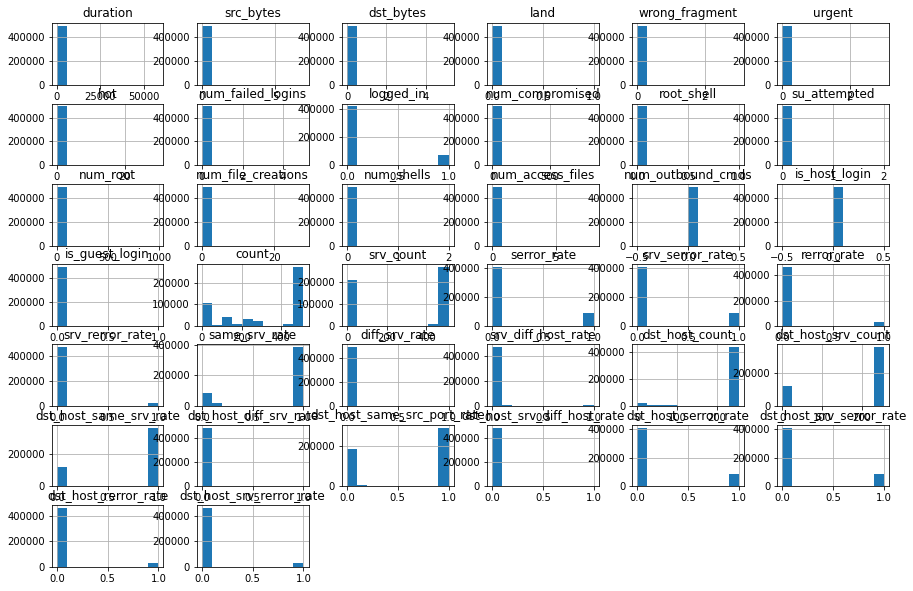

In [ ]:
# Histogram
data.hist(figsize = (15,10))
plt.show()

Before calculating the density function, we will do some procedures, due to the singularity in some attributes.

In bloxplot plots, we will see that the dispersion of the dataset attributes is very different.

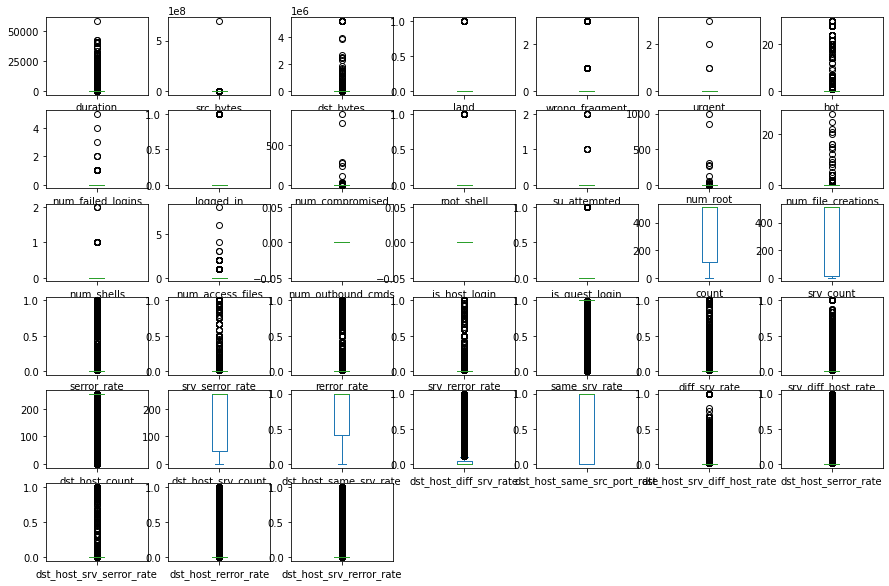

In [ ]:
# Boxplot
data.plot(kind = 'box', subplots = True, layout = (6,7), sharex = False, sharey = False, figsize = (15,10))
plt.show()

### Multimodal Visualizations

When viewing the correlations between attributes through the correlation matrix, we will notice that there appears to be some structure to the order of the attributes. The blue around the diagonal suggests that attributes that are close to each other are generally more correlated with each other. The red also suggest some moderate negative correlation.

Let's now check the covariance between the numerical variables in the dataset. The **covariance** represents how two numerical variables are related. There are several ways to calculate the correlation between two variables, such as the Pearson correlation coefficient, which could be:
* Close to -1: there is a negative correlation between the variables, 
* Close to +1: there is a positive correlation between the variables. 
* 0: there is no correlation between the variables.

<i>NOTE: This information is relevant because some algorithms such as linear regression and logistic regression may present performance problems if there are highly correlated attributes. It is worth consulting the algorithm's documentation to check whether any type of dataset treatment is necessary.</i>

We previously talked about the importance of correlation between attributes, and now we will visualize this information in graphic format. The **correlation matrix** graphically displays the correlation between the numerical attributes of the dataset. They are furthest from each other in the ordering. 

The following code displays the correlation matrix.

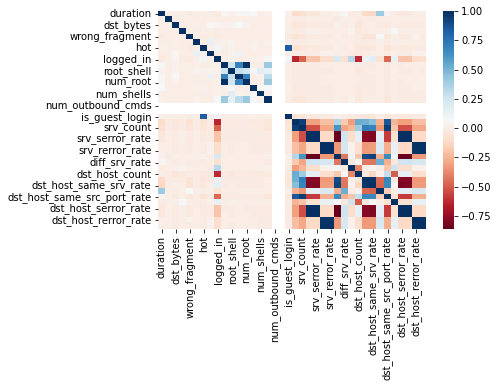

In [ ]:
# Correlation Matrix with Matplotlib Seaborn
sns.heatmap(data.corr(), cmap='RdBu');

The scatter plot shows the relationship between two variables. Let's display one for each pair of dataset attributes, using Seaborn. However, due to the large volume of data, it will not be possible to carry out this analysis at this time.

## 6. Preprocessing data

### Numerical Transformations

We can normalize numerical data (38 attributes) using the MinMaxScaler object, from the Scikit-learn package. The default scale is the range [0,1], but it is possible to specify another range through the feature_range parameter, which will be used for all normalized variables.

In [ ]:
# setting the transformer as min max scaler
scaler = MinMaxScaler()

# transform continuous data only!
df_number = data.select_dtypes(exclude=['object'])
X_scaled = scaler.fit_transform(df_number)
print(X_scaled)

[[0.00000000e+00 1.48837072e-06 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 7.49954238e-07 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 4.73048058e-07 4.36429826e-05 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 1.48837072e-06 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.48837072e-06 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.95655036e-07 1.10329460e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


### Categorical Transformations

For categorical data (the remaining 3 attributes, excluding the class), the best method to consider is OneHotEncoder, as there is no defined order in relation to them. In this case, the Dummy encoder mode was chosen.

<i>Personal note: Particularly I consider methods that works with heterogeneous data as a better option, however, the encoding option is considered as a simpler way.</i>


In [ ]:
# defining the transformer as one hot encoding (with Dummy variable encoder)
encoder = OneHotEncoder(drop='first', sparse=False)

X = data.select_dtypes(exclude=[np.number])
X_encoded = encoder.fit_transform(X.values[:,0:3])

# set all column names after the encoder
column_name = pd.Series(X.columns.values[0:3])
column_name = encoder.get_feature_names_out(column_name)
print(column_name)

# display transformed data!
print(X_encoded[:5, :]) # 5 primeiras linhas, todas as colunas

['protocol_type_tcp' 'protocol_type_udp' 'service_X11' 'service_Z39_50'
 'service_auth' 'service_bgp' 'service_courier' 'service_csnet_ns'
 'service_ctf' 'service_daytime' 'service_discard' 'service_domain'
 'service_domain_u' 'service_echo' 'service_eco_i' 'service_ecr_i'
 'service_efs' 'service_exec' 'service_finger' 'service_ftp'
 'service_ftp_data' 'service_gopher' 'service_hostnames' 'service_http'
 'service_http_443' 'service_imap4' 'service_iso_tsap' 'service_klogin'
 'service_kshell' 'service_ldap' 'service_link' 'service_login'
 'service_mtp' 'service_name' 'service_netbios_dgm' 'service_netbios_ns'
 'service_netbios_ssn' 'service_netstat' 'service_nnsp' 'service_nntp'
 'service_ntp_u' 'service_other' 'service_pm_dump' 'service_pop_2'
 'service_pop_3' 'service_printer' 'service_private' 'service_red_i'
 'service_remote_job' 'service_rje' 'service_shell' 'service_smtp'
 'service_sql_net' 'service_ssh' 'service_sunrpc' 'service_supdup'
 'service_systat' 'service_telnet' 'service

In [ ]:
# Let's join them all...
dfs = pd.concat([pd.DataFrame(X_scaled, columns=df_number.columns), pd.DataFrame(X_encoded, columns=column_name), context], axis=1, join='inner')
dfs.head(10)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,labels
0,0.0,1.488371e-06,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,dos
1,0.0,7.499542e-07,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,dos
2,0.0,4.730481e-07,0.000044,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,normal
3,0.0,1.488371e-06,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,dos
4,0.0,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,dos
5,0.0,1.488371e-06,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,dos
6,0.0,1.488371e-06,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,dos
7,0.0,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,dos
8,0.0,9.129251e-07,0.000064,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,normal
9,0.0,1.488371e-06,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,dos


### Dealing with missing data

In [14]:
# checking null data
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

Since there is no missing data in the model, this part will not need to be addressed. Zeros will also not be handled, as these values ​​are part of the problem.

### Split into training set and test set

In this step, we will split the data into a training set, used in building the model, and a test set, used later to confirm the accuracy of the final model. In this test, we will be able to verify the quality of the built model, since these data is new to the model. We will use 70% of the data set for modeling and keep 20% for a first test, this set defined as validation. In this way, we will use the train-test-split strategy. Initially, we will separate the class from the others attributes, later, we will specify the size of the desired test set and a seed (to guarantee the reproducibility of the results). Finally, we will separate the training and test sets through the train_test_split command, which will return 4 data structures: the attributes and classes for the test set and attributes and classes for the training set. We will also carry out the cross-validation procedure in the process, which consists of dividing the model to test different combinations. The remaining 10% of the dataset is used at the end of the project to confirm the accuracy of the final model.

In [ ]:
# Splitting into training and test sets
array = dfs.values
X = array[:,0:115]
Y = array[:,115]

# Parameters for splitting data
train_ratio = 0.70
validation_ratio = 0.20
test_ratio = 0.10
seed = 7

# Training set is 70% of data as default
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=(1 - train_ratio), random_state=seed)

# Final test set is 10% from initial data
# Validation set is 20% from initial data
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=(test_ratio/(test_ratio + validation_ratio)), random_state=seed) 

print(x_train, x_val, x_test)

[[0.0 1.4883707192251517e-06 0.0 ... 0.0 1.0 0.0]
 [0.0 0.0 0.0 ... 0.0 0.0 0.0]
 [0.0 1.4883707192251517e-06 0.0 ... 0.0 1.0 0.0]
 ...
 [0.0 7.499542383692626e-07 0.0 ... 0.0 1.0 0.0]
 [0.0 2.036414201110382e-06 6.49795518079057e-05 ... 0.0 1.0 0.0]
 [0.0 7.499542383692626e-07 0.0 ... 0.0 1.0 0.0]] [[0.0 0.0 0.0 ... 0.0 0.0 0.0]
 [0.0 1.4883707192251517e-06 0.0 ... 0.0 1.0 0.0]
 [0.0 0.0 0.0 ... 0.0 0.0 0.0]
 ...
 [0.0 1.4883707192251517e-06 0.0 ... 0.0 1.0 0.0]
 [0.0 7.499542383692626e-07 0.0 ... 0.0 1.0 0.0]
 [0.0 1.4883707192251517e-06 0.0 ... 0.0 1.0 0.0]] [[0.0 1.4883707192251517e-06 0.0 ... 0.0 1.0 0.0]
 [0.0 0.0 0.0 ... 0.0 0.0 0.0]
 [0.0 0.0 0.0 ... 0.0 0.0 0.0]
 ...
 [0.0 0.0 0.0 ... 0.0 0.0 0.0]
 [0.0 0.0 0.0 ... 0.0 0.0 0.0]
 [0.0 7.499542383692626e-07 0.0 ... 0.0 1.0 0.0]]


The code above was refactored as follows:

In [6]:
# Parameters
train_size = 0.7
test_size = 0.2

# Preprocessing
X_train, X_val, X_test, Y_train, Y_val, Y_test = preprocessor.preprocess(df, train_size, test_size)

23369 train examples
11686 validation examples
15025 test examples


## 7. Feature Selection

This step is of fundamental importance in evaluating the model, as it is through this that we will define the essential variables to generate the classifier, in order to reduce computational costs and refine the model with the most relevant features.

### Univariate Selection

The **SelectKBest()** function can be used with various statistical tests to select attributes. Let's use the chi-square test and select the 20 best attributes that can be used in prediction.

In [33]:
# number of features
k_ftr = 10

In [ ]:
# Feature selection method 1
best_var = SelectKBest(score_func=chi2, k=k_ftr)

# Set scoring to the pair (X, Y) and get selected feats
fit = best_var.fit(X, Y)

# Feature set reduction
features = fit.transform(X)

# Results
print('\nDataset feature number:', X.shape[1])
print('\nReduced feature number:', features.shape[1])

# Display feature scoring
np.set_printoptions(precision=3) # 1e-3 precision
print(fit.scores_)

# Print selected features
print(features)

# order by 20 best
sorted_attr_KB = 114 - np.argsort(fit.scores_)
print(sorted_attr_KB)

# display selected features name
print(dfs.columns[sorted_attr_KB[0:k_ftr]])

### Feature Relevance with ExtraTrees

Building the ExtraTreesClassifier.

In [ ]:
# Build a model for feature selection
modelo = ExtraTreesClassifier(n_estimators=100)
modelo.fit(X, Y)
# Display feature importance score (the greater is the score, more important is the feature). 
print(modelo.feature_importances_)

# order by 20 best
sorted_attr_ET = 114 - np.argsort(modelo.feature_importances_)
print(sorted_attr_ET)

# display selected features name
print(dfs.columns[sorted_attr_ET[0:k_ftr]])

[1.338e-03 1.285e-02 1.134e-03 1.804e-05 5.116e-03 9.453e-06 9.241e-03
 1.301e-04 1.118e-01 4.622e-03 1.145e-04 5.105e-06 7.967e-05 4.900e-05
 1.953e-05 5.771e-05 0.000e+00 0.000e+00 5.219e-04 1.277e-01 4.952e-02
 2.322e-02 3.184e-03 7.908e-03 9.720e-03 3.952e-02 5.184e-03 1.578e-02
 7.493e-02 2.091e-02 1.251e-02 1.031e-02 5.662e-02 4.069e-03 1.334e-02
 1.564e-02 6.202e-03 8.432e-03 4.118e-02 2.045e-02 5.180e-06 9.052e-11
 1.992e-05 3.879e-06 2.792e-06 6.767e-06 5.683e-07 1.101e-07 4.543e-06
 4.770e-06 7.306e-03 1.918e-07 4.070e-03 8.344e-02 8.765e-07 9.000e-07
 1.111e-04 6.268e-04 2.555e-03 8.653e-06 8.061e-07 8.873e-02 2.466e-07
 3.464e-05 6.845e-07 5.522e-07 3.682e-10 4.292e-07 9.783e-07 7.993e-06
 2.220e-06 2.438e-07 1.023e-10 3.993e-07 7.453e-07 3.153e-06 5.005e-07
 4.838e-06 1.752e-04 1.096e-02 1.358e-06 4.943e-14 1.117e-05 1.137e-07
 2.245e-02 5.987e-08 1.049e-06 5.423e-06 1.407e-06 5.412e-03 4.200e-09
 1.390e-06 1.382e-06 3.524e-06 3.806e-06 1.663e-04 1.031e-06 2.337e-05
 1.552

Note that these two methods have selected very different features, leading to alternative points of view in our model construction.

In the code, features are presented as follows:

In [7]:
# feature numbers
k_ftr = 20
# Feature selection
sorted_attr_KB = feat_selector.selectChiSquare(X_train, Y_train, k_ftr)
print(sorted_attr_KB)
sorted_attr_ET = feat_selector.selectExtraTrees(X_train, Y_train, k_ftr)
print(sorted_attr_ET)


Original feature set size: 115

Reduced set size: 20
[ 32  18   6  19  29  30  25   8  10  22  34  35  21  17   5  85  97  80
 112  16]
[26  1 33  4 37 36 23 24 28 31 32  8 29 19 22 21 34 35 30 25]


## 8. Classification models

### Model creation and evaluation: cross-validation

To analyze the performance of the models on this dataset, we will use 10-fold cross-validation and evaluate the models using the *accuracy* metric. Let's initially configure the number of folds and evaluation metrics parameters.

In [8]:
# Parameters
num_folds = 10
scoring = 'accuracy'

Five classic machine learning algorithms are evaluated in the construction of models, including a classifier based on logistic regression, a decision tree, a Bayesian estimator based on Gaussians, a linear discriminant and a linear SVM estimator. k-NN was not used because of its prohibitive performance in high-dimensional problems as well as the traditional SVM, which has the same problem.

In [9]:
# Generating models
selector = []
selector.append(('Chi-2', sorted_attr_KB))
selector.append(('XTrees', sorted_attr_ET))
selector.append(('None', None))
print(selector)

[('Chi-2', array([ 32,  18,   6,  19,  29,  30,  25,   8,  10,  22,  34,  35,  21,
        17,   5,  85,  97,  80, 112,  16])), ('XTrees', array([26,  1, 33,  4, 37, 36, 23, 24, 28, 31, 32,  8, 29, 19, 22, 21, 34,
       35, 30, 25])), ('None', None)]


Several models were prepared for execution.

In [10]:
feat_select_models = []
for name, features in selector:
    print("Generating classification for", name)
    ml_batch_builder = MlBatchBuilder(features)
    ml_batch_builder.insert_model(WekaModel("weka.classifiers.trees.J48"), X_train, Y_train)    # DTs
    ml_batch_builder.insert_model(WekaModel("weka.classifiers.functions.SMO"), X_train, Y_train) # SVM
    ml_batch_builder.insert_model(WekaModel("weka.classifiers.lazy.IBk"), X_train, Y_train)  # kNN - k = 1
    ml_batch_builder.insert_model(WekaModel("weka.classifiers.trees.RandomForest"), X_train, Y_train) # Random Forests
    ml_batch_builder.insert_model(WekaModel("weka.classifiers.bayes.NaiveBayes"), X_train, Y_train) # Naive Bayes        ml_batch_builder.insert_model(WekaModel("weka.classifiers.functions.MultilayerPerceptron"), X_train, Y_train)
    feat_select_models.append((name, ml_batch_builder))
print("Done!")

Generating classification for Chi-2
Generating classification for XTrees
Generating classification for None
Pronto!


In this context, we will evaluate the models with cross-validation and based on each feature selection method used previously, we have the results for each classifier, with model 1 using features chosen by chi-square and model 2 using the ones chosen by ExtraTrees.

In [11]:
np.random.seed(7) # seed setting

# Model evaluation
set_results = []
set_names = []
for s_name, s_model in feat_select_models:
  results = []
  names = []
  print("\nModel %s:\n" % s_name)
  for m_name, m_model in s_model.get_models():
    X_selected = s_model.set_features(X_train)
    cv_results = ml_eval.\
    evaluate_cross_validation(m_model, X_selected, Y_train, \
                              num_folds, scoring)
    results.append(cv_results)
    names.append(m_name)
    msg = "%s: %f (%f)" % (m_name, cv_results.mean(), cv_results.std())
    print(msg)
  set_results.append(results)
  set_names.append(names)


Model Chi-2:

J48: 0.988677 (0.002172)
SMO: 0.970331 (0.002634)
IBk: 0.987954 (0.002611)
RandomForest: 0.990806 (0.001662)
NaiveBayes: 0.921381 (0.006246)

Model XTrees:

J48: 0.994722 (0.001028)
SMO: 0.981313 (0.001899)
IBk: 0.993104 (0.001668)
RandomForest: 0.997872 (0.000571)
NaiveBayes: 0.925169 (0.005809)

Model None:

J48: 0.996084 (0.001123)
SMO: 0.984080 (0.001663)
IBk: 0.989231 (0.002171)
RandomForest: 0.997914 (0.000553)
NaiveBayes: 0.911080 (0.005662)


The logistic regression, decision trees, linear discriminant and SVM methods achieved good results with the first feature selection model, Naive Bayes had an average performance, but had a larger standard deviation. The second model did not present significant differences in relation to the first, both presented a very similar performance.

After execution, all algorithms are further compared.

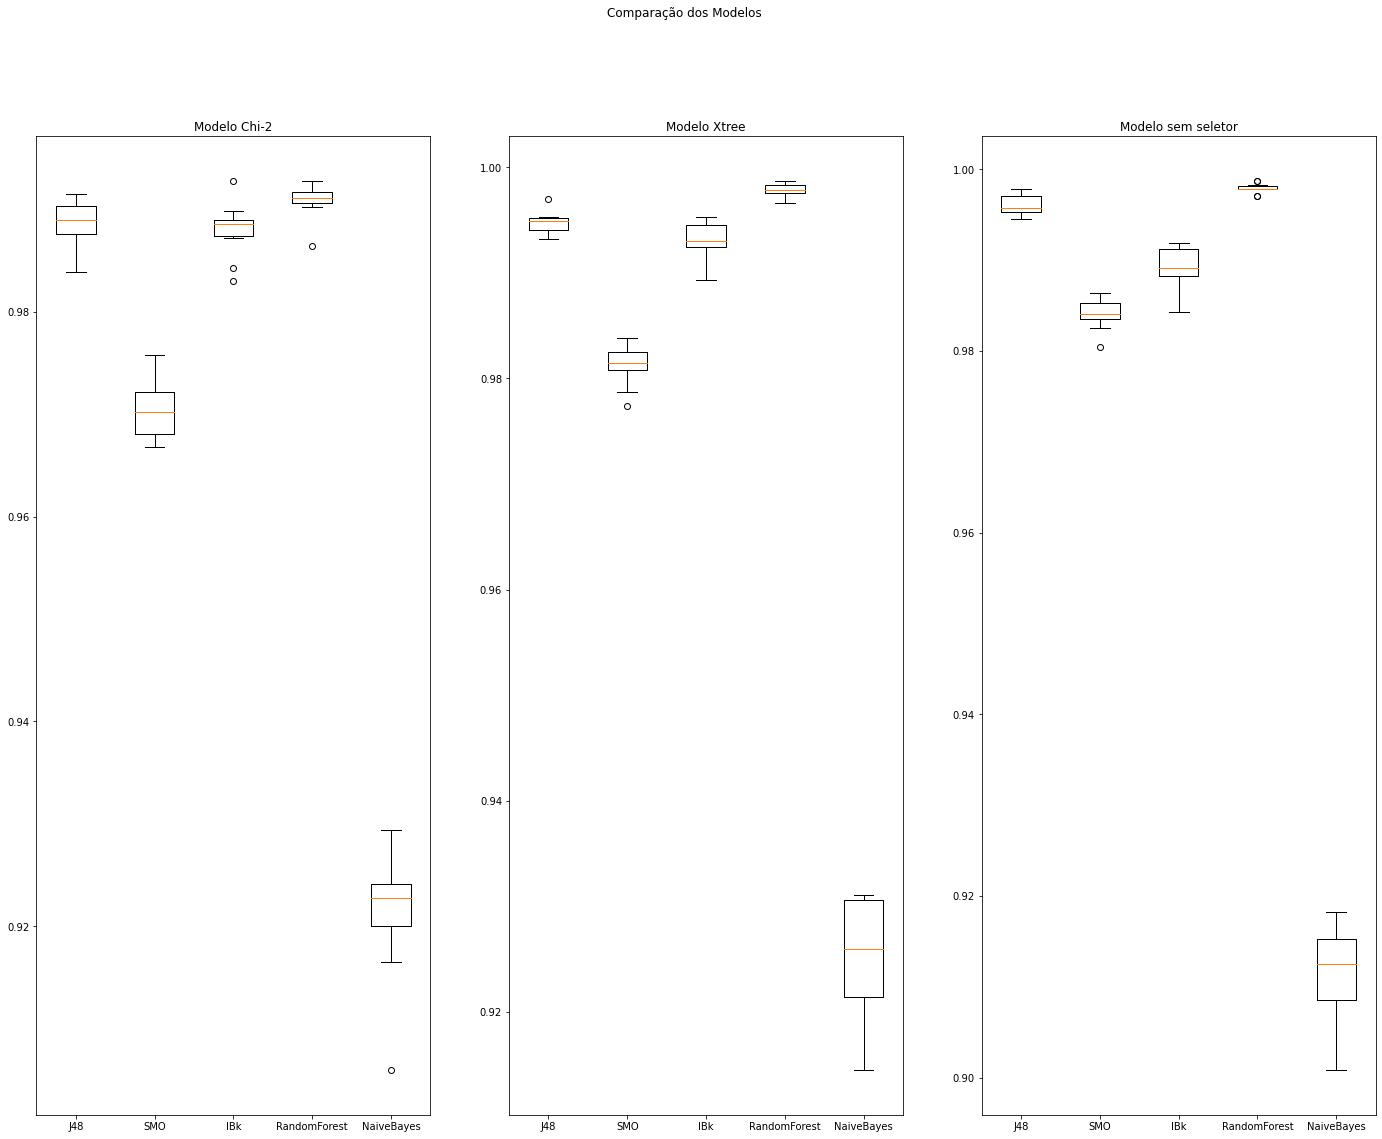

In [13]:
# Model comparison
plt.rcParams["figure.figsize"] = (24,18)
fig = plt.figure() 
fig.suptitle('Model comparison') 
# all classifiers
ax = fig.add_subplot(131) 
plt.title('Chi-2 model') 
plt.boxplot(set_results[0]) 
ax.set_xticklabels(set_names[0]) 
ax = fig.add_subplot(132) 
plt.title('Xtree model') 
plt.boxplot(set_results[1]) 
ax.set_xticklabels(set_names[1]) 
ax = fig.add_subplot(133) 
plt.title('No feature selection') 
plt.boxplot(set_results[2]) 
ax.set_xticklabels(set_names[2]) 
plt.show()

### Model creation and evaluation: validation data testing

Once cross-validation has been performed, now we run each algorithm applying it to the validation data for a complete analysis. It is worth noting that there are not many parameter adjustments to be made at the time.

```
# Perform training and use validation data for testing
for s_name, s_model in selector:
  print("\nModel %s:\n" % s_name)
  for m_name, m_model in models:
    set_model = m_model
    set_model.fit(x_train, y_train)
    predictions = set_model.predict(x_val)
    print("\nAlgorithm %s:\n" % m_name)
    print(accuracy_score(y_val, predictions))
    print(confusion_matrix(y_val, predictions))
    print(classification_report(y_val, predictions))
```

In [11]:
# Performs training and uses validation data for testing
for s_name, s_model in feat_select_models:
  print("\nModel %s:\n" % s_name)
  for m_name, m_model in s_model.get_models():
    X_selected = s_model.set_features(X_val)
    predictions = ml_eval.predict(m_model, X_selected)
    print("\nAlgorithm: %s\n" % m_name)
    print(metrics.accuracy_score(Y_val, predictions))
    print(metrics.confusion_matrix(Y_val, predictions))
    print(metrics.classification_report(Y_val, predictions))


Model Chi-2:


Algorithm: J48

0.9854381333560419
[[5209   19    2    2    4]
 [  23 6203   13    4    0]
 [   2   92   94    0    0]
 [   0    8    0   63    1]
 [   0    1    0    0    3]]
              precision    recall  f1-score   support

        _dos       1.00      0.99      1.00      5236
     _normal       0.98      0.99      0.99      6243
      _probe       0.86      0.50      0.63       188
        _r2l       0.91      0.88      0.89        72
        _u2r       0.38      0.75      0.50         4

    accuracy                           0.99     11743
   macro avg       0.83      0.82      0.80     11743
weighted avg       0.98      0.99      0.98     11743


Algorithm: SMO

0.9743677084220387
[[5084  151    0    1    0]
 [   8 6222    0   13    0]
 [   5  112   71    0    0]
 [   0   10    0   61    1]
 [   0    0    0    0    4]]
              precision    recall  f1-score   support

        _dos       1.00      0.97      0.98      5236
     _normal       0.96      1.00


Algorithm: RandomForest

0.9987226432768458
[[5231    4    1    0    0]
 [   0 6243    0    0    0]
 [   0    4  184    0    0]
 [   0    4    0   67    1]
 [   0    1    0    0    3]]
              precision    recall  f1-score   support

        _dos       1.00      1.00      1.00      5236
     _normal       1.00      1.00      1.00      6243
      _probe       0.99      0.98      0.99       188
        _r2l       1.00      0.93      0.96        72
        _u2r       0.75      0.75      0.75         4

    accuracy                           1.00     11743
   macro avg       0.95      0.93      0.94     11743
weighted avg       1.00      1.00      1.00     11743


Algorithm: NaiveBayes

0.8665588009878226
[[5081   88   66    0    1]
 [  28 4907  632   16  660]
 [   1   13  160    0   14]
 [   0    1    2   25   44]
 [   0    0    0    1    3]]
              precision    recall  f1-score   support

        _dos       0.99      0.97      0.98      5236
     _normal       0.98      0.7

However, even with the correct predictions, some classes were not registered in the model, such as `u2s` and the class `r2l` was also left without representation in the model, possibly due to the imbalance of these classes, in favor of the other 2 classes of attacks and the normal class.

## 9. Ensemble Methods

Another way to improve the performance of algorithms is to use ensemble methods. We will evaluate two Bagging methods:
* Random Forests (RF)
* Extra Trees (ET)

### Cross-validation

We will again use 10-fold cross-validation. Like boosting algorithms, these are also based on decision trees. We will not use Boosting methods due to their required time to execute in this analysis.


In [ ]:
np.random.seed(7) # seed setting

# Bagging Ensemble Methods
num_estimator = 10
ens_batch_builder.insert_model(RFEnsembleModel(num_estimator), X_train, Y_train)
ens_batch_builder.insert_model(ETEnsembleModel(num_estimator), X_train, Y_train)

ba_results = []
ba_names = []
for s_name, s_model in selector:
  results = []
  names = []
  print("\nModel %s:\n" % s_name)
  for e_name, e_model in ens_batch_builder.get_models():
    cv_results = \
    ml_evaluator.evaluate_cross_validation(m_model, X_train[:, s_model], \
                                           Y_train, num_folds, scoring)
    results.append(cv_results)
    names.append(e_name)
    msg = "%s: %f (%f)" % (e_name, cv_results.mean(), cv_results.std())
    print(msg)
  ba_results.append(results)
  ba_names.append(names)

In [ ]:
# Model comparison
fig = plt.figure() 
fig.suptitle('Model comparison') 
# all classifiers
ax = fig.add_subplot(121) 
plt.title('Chi-2 model') 
plt.boxplot(ba_results[0]) 
ax.set_xticklabels(ba_names[0]) 
ax = fig.add_subplot(122) 
plt.title('Xtree model') 
plt.boxplot(ba_results[1]) 
ax.set_xticklabels(ba_names[1]) 
plt.show()

### Validation tests

Likewise, we will perform the test on the validation data using the previously employed ensembles.

In [43]:
# Realiza o treinamento e usa os dados de validação para teste
for s_name, s_model in ens_batch_model:
  print("\nModelo %s:\n" % s_name)
  for ba_name, ba_model in s_model.get_models():
    predictions = ml_evaluator.predict(m_model, s_model.set_features(X_val))
    print("\nAlgoritmo %s:\n" % ba_name)
    print(accuracy_score(Y_val, predictions))
    print(confusion_matrix(Y_val, predictions))
    print(classification_report(Y_val, predictions))


Modelo Chi-2:


Algoritmo RF:

0.8523489932885906
[[238   5]
 [ 39  16]]
              precision    recall  f1-score   support

         dos       0.86      0.98      0.92       243
      normal       0.76      0.29      0.42        55

    accuracy                           0.85       298
   macro avg       0.81      0.64      0.67       298
weighted avg       0.84      0.85      0.82       298


Algoritmo ET:

0.8523489932885906
[[238   5]
 [ 39  16]]
              precision    recall  f1-score   support

         dos       0.86      0.98      0.92       243
      normal       0.76      0.29      0.42        55

    accuracy                           0.85       298
   macro avg       0.81      0.64      0.67       298
weighted avg       0.84      0.85      0.82       298


Modelo XTrees:


Algoritmo RF:

0.9664429530201343
[[237   6]
 [  4  51]]
              precision    recall  f1-score   support

         dos       0.98      0.98      0.98       243
      normal       0.89      0

In both modes, both Random Forests and Extra Trees achieved superior performance compared to the other methods, although the difference is small compared to the other algorithms.

## 10. Concluding the model

### Test data and intrusion detection

Finally, we use the remaining 10% portion of the dataset with those algorithms that performed better, namely Decision Tree, Logistic Regression, SVM and both ensemble methods, as they had achieved similar results.

Differently from those tests performed on validation data, accuracy analysis will also be based on:

1. **TP** - True Positives - an actual attack scenario has been detected;
2. **TN** - True Negatives - system at normal operation, and no alarm was set;
3. **FP** - False Positives - no attack, but an alarm was set;
4. **FN** - False Negatives - system under attack scenario, but without its detection.

Calculating them and obtaining the model's detection rates according to known intrusion detection metrics, namely:

1. **sensitivity** - Model sensitivity, related to TP; 
2. **specificity** - Model specificity, related to TN; 
3. **precision** - Model precision, related to performed detection;
4. **accuracy** - Model accuracy, related to TP and TN. 


In [ ]:

# Generating models
num_estimator = 10
batch_builder = MlBatchBuilder()
ids_evaluator = IDSEvaluator()
batch_builder.insert_model(LRModel(), X_train, Y_train)
batch_builder.insert_model(TreesModel(), X_train, Y_train)
batch_builder.insert_model(SVMModel(), X_train, Y_train)
batch_builder.insert_model(RFEnsembleModel(num_estimator), X_train, Y_train)
batch_builder.insert_model(ETEnsembleModel(num_estimator), X_train, Y_train)

# Perform training and use validation samples as test
selector = []
selector.append(('Chi-2', sorted_attr_KB))
selector.append(('XTrees', sorted_attr_ET))
for s_name, s_model in selector:
  print("\nModel %s: " % s_name)
  for m_name, m_model in batch_builder.get_models():
    print("\nModel %s:\n" % m_name)
    Y_pred = ml_evaluator.predict(m_model, X_test)
    sensitivity, specificity, precision, accuracy = \
    ids_evaluator.evaluate_detection('normal', Y_test, Y_pred)
    print("Sensitivity: ", sensitivity)
    print("Specificity: ", specificity)
    print("Precision: ", precision)
    print("Accuracy: ", accuracy)

These results indicate that evaluated models presented similar performance at most metrics, pointing that they can perform good intrusion detection according to these tests.

### Novel data analysis

Considering 5 new instances whose output class is unknown, we can apply our newly trained models to estimate the classes! To do this, it will be necessary to normalize the data first (using the same scale as the data used during model training). We chose to store them in an array due to the less work involved in converting the model.

```
1,tcp,smtp,SF,3170,329,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,2,0.00,0.00,0.00,0.00,1.00,0.00,1.00,54,39,0.72,0.11,0.02,0.00,0.02,0.00,0.09,0.13
0,tcp,netstat,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,268,19,0.00,0.00,1.00,1.00,0.07,0.06,0.00,255,19,0.07,0.06,0.00,0.00,0.00,0.00,1.00,1.00
0,icmp,ecr_i,SF,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,135,135,0.00,0.00,0.00,0.00,1.00,0.00,0.00,255,255,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
0,'tcp','other','RSTR',0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.00,0.00,1.00,1.00,1.00,0.00,0.00,255,1,0.00,0.94,0.93,0.00,0.00,0.00,0.93,1.00
0,'udp','ntp_u','SF',48,48,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.00,0.00,0.00,0.00,1.00,0.00,0.00,115,46,0.40,0.02,0.40,0.00,0.00,0.00,0.00,0.00
```

In [ ]:
novel = np.array([[1,'tcp','smtp','SF',3170,329,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,2,0.00,0.00,0.00,0.00,1.00,0.00,1.00,54,39,0.72,0.11,0.02,0.00,0.02,0.00,0.09,0.13],
     [0,'tcp','netstat','REJ',0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,268,19,0.00,0.00,1.00,1.00,0.07,0.06,0.00,255,19,0.07,0.06,0.00,0.00,0.00,0.00,1.00,1.00],
     [0,'icmp','ecr_i','SF',1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,135,135,0.00,0.00,0.00,0.00,1.00,0.00,0.00,255,255,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00],
     [0,'tcp','other','RSTR',0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.00,0.00,1.00,1.00,1.00,0.00,0.00,255,1,0.00,0.94,0.93,0.00,0.00,0.00,0.93,1.00],
     [0,'udp','ntp_u','SF',48,48,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.00,0.00,0.00,0.00,1.00,0.00,0.00,115,46,0.40,0.02,0.40,0.00,0.00,0.00,0.00,0.00]])

X_novel = preprocessor.evaluate_novel_data(novel)

# Classification procedures
selector = []
selector.append(('Chi-2', sorted_attr_KB))
selector.append(('XTrees', sorted_attr_ET))
for s_name, s_model in selector:
  print("\nModel %s: " % s_name)
  for m_name, m_model in batch_builder.get_models():
    print("\nModel %s:\n" % m_name)
    Y_novel = ml_evaluator.predict(m_model, X_novel)
    print(Y_novel)

In this case, all classifiers have obtained the same classification result, indicating that they have similar performance. Some groups of data may have different results under certain conditions.

## 11. Imbalanced data issues

In [ ]:
# classes distribution
print(data.groupby('class_type').size())

As seen throughout this work, we have a set of imbalanced data since classes have skewed proportions, so the addition of a balancing step by removing redundant data during the data selection is a needed step, as in this example:

In [ ]:
# class skewness
data_unique = data.copy()
data_unique.drop_duplicates(subset=None, keep='first', inplace=True)
# same as above
data_unique['class_type'].value_counts()

In [ ]:
# Seaborn Scatter Plot

sns.pairplot(data, hue = "class_type", height = 2.5);

Below, we will list a new library and will also include a new data balancing class. The method chosen was undersampling (low sampling) of majority classes, in order to provide a fairer number of attack classes in relation to the normal class. Furthermore, classes with low sampling will suffer oversampling (high sampling), seeking a value that is compatible with that of the other classes.

To achieve this objective, we use the median value of the number of samples contained in the classes and make appropriate adjustments.

In [ ]:
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler

df = data_unique

df_normal = df[df['class_type'] == 'normal']
df_dos = df[df['class_type'] == 'dos']
df_probe = df[df['class_type'] == 'probe']
df_r2l = df[df['class_type'] == 'r2l']
df_u2r = df[df['class_type'] == 'u2r']

class_counts = df['class_type'].value_counts().values.reshape(-1, 1)
c_median = np.median(class_counts).astype('int64')

df_normal_resampled = resample(df_normal,n_samples=c_median,random_state=0)
df_dos_resampled = resample(df_dos,n_samples=c_median,random_state=0)
df_r2l_resampled = resample(df_r2l,n_samples=c_median,random_state=0)
df_u2r_resampled = resample(df_u2r,n_samples=c_median,random_state=0)
df_upsampled = pd.concat([df_normal_resampled, df_dos_resampled, df_probe, \
                          df_r2l_resampled, df_u2r_resampled])
df_upsampled.sample(frac=1).reset_index(drop=True)

Another class was added to our framework.

In [ ]:
from sklearn.utils import resample

class DataBalancer:

    def balance_data(self, df):
        """ Responsible for balancing dataset. 
            source: https://elitedatascience.com/imbalanced-classes
        """
        # cleansing data
        df_normal = df[df['class_type'] == 'normal']
        df_dos = df[df['class_type'] == 'dos']
        df_probe = df[df['class_type'] == 'probe']
        df_r2l = df[df['class_type'] == 'r2l']
        df_u2r = df[df['class_type'] == 'u2r']

        class_counts = df['class_type'].value_counts().values.reshape(-1, 1)
        c_median = np.median(class_counts).astype('int64')

        df_normal_resampled = resample(df_normal,n_samples=c_median,random_state=0)
        df_dos_resampled = resample(df_dos,n_samples=c_median,random_state=0)
        df_r2l_resampled = resample(df_r2l,n_samples=c_median,random_state=0)
        df_u2r_resampled = resample(df_u2r,n_samples=c_median,random_state=0)
        df_upsampled = pd.concat([df_normal_resampled, df_dos_resampled, df_probe, \
                                  df_r2l_resampled, df_u2r_resampled])
        return df_upsampled.sample(frac=1).reset_index(drop=True)



Using this class, we evaluate the dataset as follows:

In [ ]:
# Using balanced data to build ML model
data_balanced = DataBalancer().balance_data(data_unique)
Xb_tr, Xb_vl, Xb_te, Yb_tr, Yb_vl, Yb_te = PreProcessor().preprocess(data_balanced, 0.7, 0.25)

# Using Random Forests to predict and Chi^2 to select features
new_model = RFEnsembleModel(10).train(Xb_tr[:, sorted_attr_KB], Yb_tr)

# Evaluating first tests batch
Yb_pr = MlEvaluator().predict(new_model, Xb_vl[:, sorted_attr_KB])
print(accuracy_score(Yb_vl, Yb_pr))
print(confusion_matrix(Yb_vl, Yb_pr))
print(classification_report(Yb_vl, Yb_pr))

# Evaluating second tests batch
Yb_tp = MlEvaluator().predict(new_model, Xb_te[:, sorted_attr_KB])
sens, spec, prec, acc = IDSEvaluator().evaluate_detection('normal', Yb_te, Yb_tp)
print("Sensitivity: ", sens)
print("Specificity: ", spec)
print("Precision: ", prec)
print("Accuracy: ", acc)


With the balanced model, we were able to achieve a similar result to those obtained using the unbalanced data in this analysis. Data balancing is an important activity during the training of ML models and in this work, it was included as an additional step to show its importance and how we can achieve a result close to that obtained previously.

## 12. Project summary

In short, in this work we presented a complex multi-class classification and anomaly detection problem. The steps covered were:
* Problem Definition (**KDD-CUP '99**).
*User story of the problem
* Source code based on OOP
* Data loading
* Data analysis (we verified that they were on the same scale, but with different data distributions).
* Preprocessing (Normalization, formatting of categorical data)
* Attribute Selection (with Chi-square and ExtraTrees)
* Missings treatment (Not necessary).
* Evaluation of models with data standardization (so far, CART, Logistic Regression and SVM have performed excellently, Naive Bayes has performed averagely).
* Adjusting the models (It was not necessary, as there were not many parameters to be adjusted).
* Ensemble methods (Improved performance, although not much different from other algorithms)
*Model finalization (use all training data and validate using validation dataset).
* Data balancing (important for analysis)

The work was not exhaustive, it was possible to present many of the ML concepts and resources available in the Pandas, Scikit-Learn libraries and other Python tools. Computational costs were one of the challenges encountered in this work, however, the objectives were fulfilled as proposed.

**Concluding remarks**

In this project, a recurrent database was tested that has application in an everyday problem (in this case, intrusion detection in computer networks) and with complexity that implies good challenges (considering a large number of samples, features and imbalanced classes), including pre-processing, attribute selection and classification using several ML models, including a test evaluating the intrusion detection potential of each model evaluated. There are other steps that can be included in this analysis, such as other models to be evaluated, including parameters to be adjusted, and further exploration of other attributes. Software engineering practices were adopted in the processes related to data acquisition, processing and classification, allowing for mostly clean code. It is no surprise that these data and models are widely studied in academia and are also important in large corporations, being an inspiration for several products related to the management of computer networks in general.